In [ ]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = rgb2gray(imread('/content/drive/MyDrive/images/Voldi.png'))
w, h = img.shape


In [ ]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_identity)


In [ ]:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @np.array([[1,0,0],[0,1,-h],[0,0,1]])
img1 = ndi.affine_transform(img, mat_reflect) # offset=(0,h)

In [ ]:
s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_scale)


In [ ]:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img1 = ndi.affine_transform(img1, mat_rotate)


In [ ]:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
img1 = ndi.affine_transform(img1, mat_shear)

In [ ]:
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @mat_shear
ndi.affine_transform(img, mat_all)

array([[0.        , 0.        , 0.        , ..., 0.11531045, 0.11710896,
        0.11889947],
       [0.        , 0.        , 0.        , ..., 0.11586494, 0.11774575,
        0.11912429],
       [0.        , 0.        , 0.        , ..., 0.11636655, 0.1169906 ,
        0.11553663],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

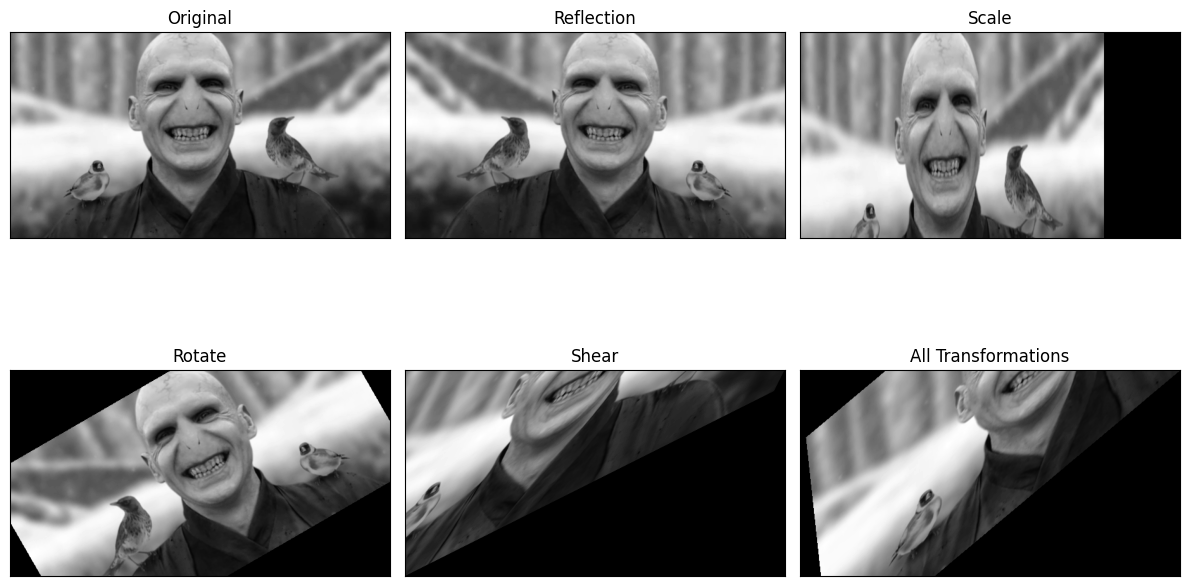

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8)) # 2 baris, 3 kolom

# Gambar Original
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# Gambar Reflection
axes[0, 1].imshow(ndi.affine_transform(img, mat_reflect), cmap='gray') #offset=(0,h)
axes[0, 1].set_title('Reflection')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# Gambar Scale
axes[0, 2].imshow(ndi.affine_transform(img, mat_scale), cmap='gray')
axes[0, 2].set_title('Scale')
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])

# Gambar Rotate
axes[1, 0].imshow(ndi.affine_transform(img, mat_rotate), cmap='gray')
axes[1, 0].set_title('Rotate')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# Gambar Shear
axes[1, 1].imshow(ndi.affine_transform(img, mat_shear), cmap='gray')
axes[1, 1].set_title('Shear')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

# Gambar All Transformations
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
img_transformed = ndi.affine_transform(img, mat_all)
axes[1, 2].imshow(img_transformed, cmap='gray')
axes[1, 2].set_title('All Transformations')
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])


plt.tight_layout() # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()